## Perceptron Trick for classification

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

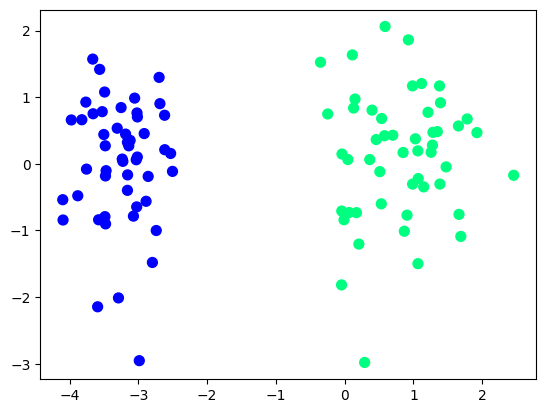

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)

In [4]:
def step(z):
    if z>0:
        return 1
    else:
        return 0

In [5]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    W = np.ones(X.shape[1])
    epochs = 1000
    lr = 0.01

    for i in range(epochs):
        j = np.random.randint(0,100)
        y_pred = step(np.dot(X[j],W))
        W = W + lr*(y[j] - y_pred)*X[j]

    return W[0],W[1:]

In [6]:
intercept_,coeff_ = perceptron(X,y)

In [7]:
print('Intercept :',intercept_)
print('Coefficients :',coeff_)

Intercept : 1.1600000000000001
Coefficients : [1.0229032  0.60455205]


In [8]:
m = -(coeff_[0]/coeff_[1])
b = -(intercept_/coeff_[1])

In [9]:
x_in = np.linspace(-3,3,100)
y_in = m*x_in+b

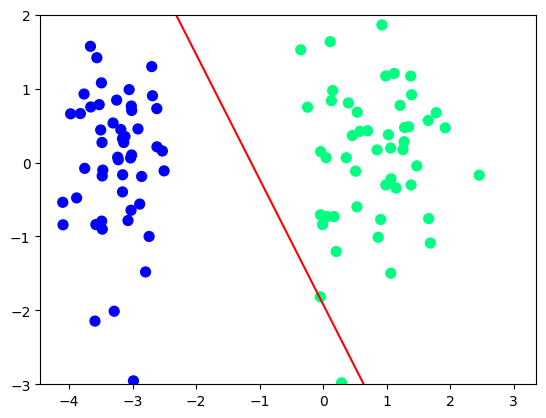

In [10]:
plt.plot(x_in,y_in,color = 'red')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)
plt.ylim(-3,2)
plt.show()

## Perceptron trick vs Sklearn Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log = LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [13]:
m = -(log.coef_[0][0]/log.coef_[0][1])
b = -(log.intercept_/log.coef_[0][1])

In [14]:
x_in_log = np.linspace(-3,3,100)
y_in_log = m*x_in + b

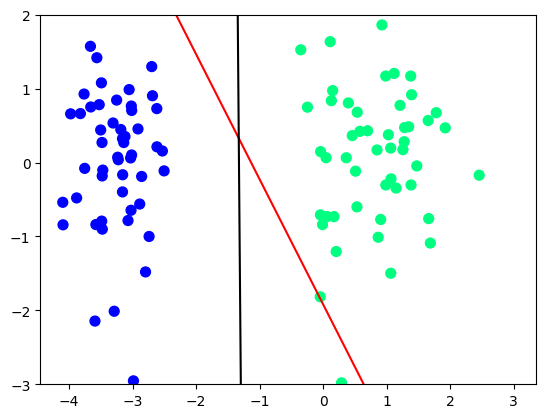

In [15]:
plt.plot(x_in,y_in,color = 'red')
plt.plot(x_in_log,y_in_log,color = 'black')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)
plt.ylim(-3,2)
plt.show()

#### This shows Sklearn Logistic Regression model is highly optimized than perceptron trick as it classify the model symmetrically with less training and test errror

#### Also Perceptron trick model overfits than Sklearn logistic regression model